In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

from sklearn.cluster import Birch
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df =  pd.read_csv('raw_data.csv')
df.columns =["start", "total", 'overhead', 'duration']

df['c'] = df['total'].diff()
df_filtered = df[df['c'] != 0]

index_list = df_filtered.index.tolist() # list of the start poisitions of index for change of values 
print(len(index_list))
print('\n')
print(index_list)

l_mod = index_list + [max(index_list)+1] # creating a list of indexes to iterate over (must have 0 in it)
list_of_dfs = [df.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)] # creating a list of dfs for each index

len(list_of_dfs)

155


[0, 488, 1400, 2049, 3095, 4357, 5836, 7069, 8112, 9380, 10387, 11042, 11969, 12622, 13542, 14572, 15737, 16762, 17684, 18869, 19817, 20954, 22256, 23394, 24759, 26160, 27499, 28710, 29676, 30359, 31236, 31922, 32953, 34313, 35763, 37158, 38767, 40147, 41726, 43438, 45022, 46669, 48253, 49663, 50724, 52092, 53102, 54364, 55426, 56791, 57797, 59121, 60546, 61902, 62969, 63638, 64558, 65763, 67181, 68721, 70359, 72077, 73635, 75149, 76644, 78107, 79825, 81569, 83106, 84588, 86267, 87980, 89707, 91211, 92652, 93849, 95426, 97070, 98589, 100311, 101857, 103048, 104442, 105911, 107289, 108925, 110323, 111539, 112882, 114094, 115018, 116081, 117331, 118416, 119320, 120409, 121285, 121976, 122934, 124191, 125108, 126330, 127241, 127942, 128889, 130144, 131132, 132403, 133371, 134558, 135863, 136993, 137970, 138632, 139602, 140256, 141314, 142587, 143623, 144895, 145909, 146614, 147564, 148924, 150488, 152225, 153769, 155064, 156598, 158312, 160041, 161994, 163717, 165461, 167151, 168858

155

In [3]:
data = pd.DataFrame(columns=['avg', 'var', 'std', 'median', 'q1', 'q3', 'p90', 'cars'])
avg, var, std, median, q1, q3, p90, mode = [], [], [], [], [], [], [], []


for frame in list_of_dfs:
    median.append(frame['overhead'].median())
    avg.append(frame['overhead'].mean())
    q1.append(frame['overhead'].quantile(q =.25))
    q3.append(frame['overhead'].quantile(q =.75))
    p90.append(frame['overhead'].quantile(q =.9))
    mode.append(frame['total'].mode()[0]) # mode returns a series so we need to specify which value to return
    var.append(frame['overhead'].var())
    std.append(frame['overhead'].std())

    
    
data['median'] = median
data['q1'] = q1
data['q3'] = q3
data['p90']= p90
data['cars'] = mode
data['avg'] = avg
data['var'] = var
data['std'] = std
data

,avg,var,std,median,q1,q3,p90,cars
0,1.654107,0.210092,0.458358,1.582044,1.306363,1.881764,2.231246,200
1,1.692571,0.273200,0.522686,1.607571,1.316283,1.950820,2.324354,300
2,1.629607,0.220484,0.469557,1.557614,1.283480,1.874575,2.143453,200
3,1.715201,0.298310,0.546178,1.625797,1.331584,1.969039,2.369109,300
4,1.791137,0.345024,0.587387,1.709305,1.351439,2.085545,2.486877,400
...,...,...,...,...,...,...,...,...
150,2.028469,1.028749,1.014273,1.775290,1.389824,2.346458,3.081876,600
151,1.889810,0.517977,0.719706,1.750722,1.392663,2.160634,2.717248,500
152,2.082111,1.138836,1.067163,1.850352,1.412053,2.380013,3.182939,600
153,2.170848,1.767143,1.329339,1.880450,1.365687,2.530237,3.445871,700


In [11]:
data.fillna(method = "ffill",inplace=True)
d = data[['avg', 'var', 'std', 'median', 'q1', 'q3', 'p90']].to_numpy()

### Features: 'avg', 'var', 'std', 'median', 'q1', 'q3', 'p90'

In [13]:
scaler = StandardScaler()
scaler.fit(d)
X=scaler.transform(d)    

pca = PCA()
x_new = pca.fit_transform(X)

print('The variance in the features is best explained by which principal component: \n')
print(pca.explained_variance_ratio_)
print('\n\n')
print('The importnace of each feature on the components: \n')
print(abs( pca.components_ ))

The variance in the features is best explained by which principal component: 

[8.54357389e-01 9.68100634e-02 3.55470598e-02 1.11228296e-02
 1.56511925e-03 5.18437617e-04 7.91013303e-05]



The importnace of each feature on the components: 

[[0.40823136 0.37326136 0.33141116 0.36615228 0.37844901 0.38752106
  0.39588638]
 [0.04360233 0.46330282 0.65626794 0.45255879 0.2948968  0.21654531
  0.11872774]
 [0.03662444 0.25036154 0.42271136 0.39000446 0.45749792 0.47183247
  0.41624409]
 [0.05678034 0.16855358 0.27519802 0.51680138 0.63282006 0.39101136
  0.26869491]
 [0.29861512 0.46319788 0.18263624 0.05342451 0.30460854 0.41781067
  0.62666932]
 [0.15490338 0.55950903 0.38588155 0.44508989 0.25689369 0.49812246
  0.0427159 ]
 [0.8448163  0.16532578 0.15099546 0.20242705 0.03557966 0.06876078
  0.43495115]]


There is 7 principal componentnt.

PC2 explains the most variance. PC1 is right after.

For the PC 1,  average is most important. For PC 2, STD is most important

---

In [14]:
d = data[['var','median', 'q1', 'q3', 'p90']].to_numpy()
scaler = StandardScaler()
scaler.fit(d)
X=scaler.transform(d)    

pca = PCA()
x_new = pca.fit_transform(X)

print('The variance in the features is best explained by which principal component: \n')
print(pca.explained_variance_ratio_)
print('\n\n')
print('The importnace of each feature on the components: \n')
print(abs( pca.components_ ))

The variance in the features is best explained by which principal component: 

[0.87771797 0.08250093 0.02828533 0.00999287 0.0015029 ]



The importnace of each feature on the components: 

[[0.41375614 0.44123038 0.44932458 0.46231256 0.46743569]
 [0.72933349 0.553782   0.36095772 0.05831483 0.1664544 ]
 [0.39746267 0.01695045 0.59735702 0.63800391 0.2790192 ]
 [0.37251709 0.60075686 0.41830819 0.07190884 0.56583531]
 [0.01153099 0.37073594 0.36878151 0.60880752 0.59646919]]


The variance in this case can be explained mostly by one variable

All features are more or less equaly important

In [15]:
d = data[['median', 'q1', 'q3', 'p90']].to_numpy()
scaler = StandardScaler()
scaler.fit(d)
X=scaler.transform(d)    

pca = PCA()
x_new = pca.fit_transform(X)

print('The variance in the features is best explained by which principal component: \n')
print(pca.explained_variance_ratio_)
print('\n\n')
print('The importnace of each feature on the components: \n')
print(abs( pca.components_ ))

The variance in the features is best explained by which principal component: 

[0.92245132 0.05512914 0.02053519 0.00188436]



The importnace of each feature on the components: 

[[0.49769403 0.49720604 0.50234292 0.50273094]
 [0.49590552 0.50910209 0.50229296 0.49253889]
 [0.61253295 0.60108026 0.3571083  0.36875408]
 [0.36219021 0.36373581 0.60648746 0.60719641]]


In [16]:
def plot_silhouette_scores(model, test_data, n_clusters_min, n_clusters_max):
    """ Plot silhouette scores and return the best number of clusters"""

    if len(model.subcluster_labels_) > 2:

        silhouette_scores = []

        clusters_range = range(n_clusters_min, n_clusters_max+1)
        results_dict = []
        # print(clusters_range)
        for number in clusters_range:
            # make a copy of the model so as not to mess up the 'correct' model
            model_cpy = model
            model_cpy.set_params(n_clusters=number)

            model_cpy.partial_fit()
            labels = model_cpy.predict(test_data)
            # print(labels)
            try: 
                s = metrics.silhouette_score(test_data, labels, metric='euclidean')
                silhouette_scores.append(s)
                results_dict.append((number, s))
            except ValueError:
                pass

        silhouette_range = [i[0] for i in results_dict]  
        plt.plot(silhouette_range[:], silhouette_scores[:])
        plt.xlabel('Number Of Clusers')
        plt.ylabel('Silhouette Score')
#         plt.savefig(folder + 'silhouette_'+ save_graph_name +'.png')
        plt.show()
        plt.close() 
        max_score = max(silhouette_scores)
        for i in results_dict:
            if i[1] == max_score:
                print("The highest silhouette scores(" + str(max_score) + ") is for " + str(i[0]) + " clusers")
                return int(i[0])
    else:
        print('couldnt get the scores, plz help')
        print('returning number of clusters = ' + str(n_clusters_min))
        return n_clusters_min

In [25]:
dropped_data = data.drop([145, 146, 154])
len(dropped_data)

152

In [26]:
test_normal = dropped_data[['median', 'q1', 'q3', 'p90']].to_numpy()
test_normal_list = np.split(test_normal, 4) # splitting data to emulate data stream

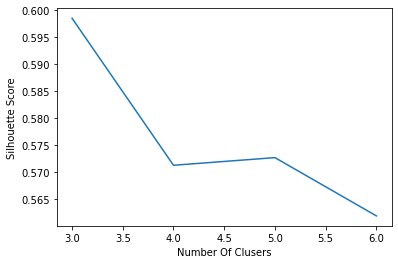

The highest silhouette scores(0.5985224357841042) is for 3 clusers


In [31]:
model = Birch(n_clusters=None, threshold=0.1)

for i in test_normal_list:
    model.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model, test_normal, 3, 6)

model.set_params(n_clusters = n)
model.partial_fit()
    
labels = model.predict(test_normal)

In [32]:
dropped_data

,avg,var,std,median,q1,q3,p90,cars
0,1.654107,0.210092,0.458358,1.582044,1.306363,1.881764,2.231246,200
1,1.692571,0.273200,0.522686,1.607571,1.316283,1.950820,2.324354,300
2,1.629607,0.220484,0.469557,1.557614,1.283480,1.874575,2.143453,200
3,1.715201,0.298310,0.546178,1.625797,1.331584,1.969039,2.369109,300
4,1.791137,0.345024,0.587387,1.709305,1.351439,2.085545,2.486877,400
...,...,...,...,...,...,...,...,...
149,1.882773,0.494155,0.702962,1.728105,1.393741,2.169759,2.746700,500
150,2.028469,1.028749,1.014273,1.775290,1.389824,2.346458,3.081876,600
151,1.889810,0.517977,0.719706,1.750722,1.392663,2.160634,2.717248,500
152,2.082111,1.138836,1.067163,1.850352,1.412053,2.380013,3.182939,600


Text(0.5, 0.98, 'Clustering without Average')

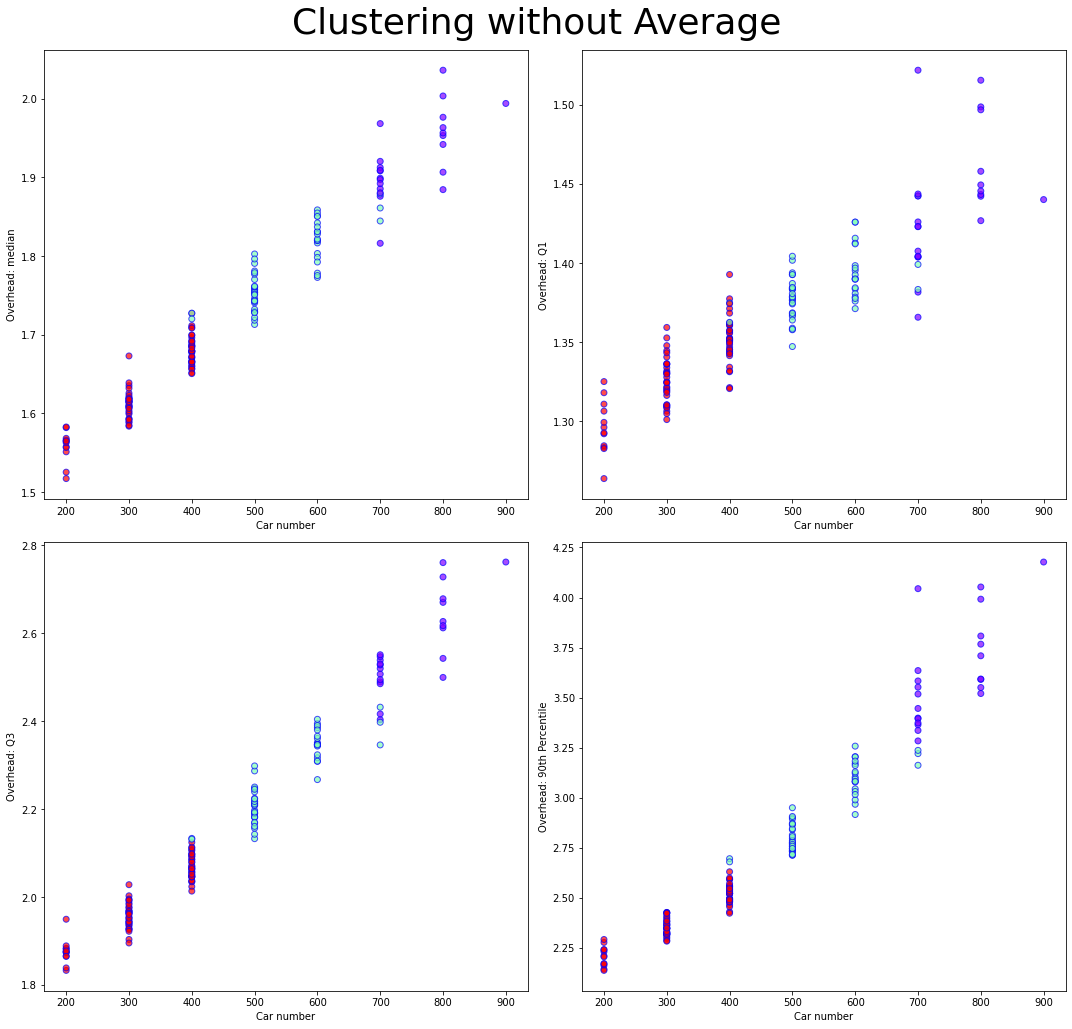

In [33]:
data_to_plot = dropped_data.to_numpy()
figure, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axs[0,0].scatter(data_to_plot[:,7], data_to_plot[:,3], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')  
axs[0,0].set_ylabel('Overhead: median')
axs[0,0].set_xlabel('Car number')

axs[0,1].scatter(data_to_plot[:,7], data_to_plot[:,4], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
axs[0,1].set_ylabel('Overhead: Q1')
axs[0,1].set_xlabel('Car number')

axs[1,0].scatter(data_to_plot[:,7], data_to_plot[:,5], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
axs[1,0].set_ylabel('Overhead: Q3')
axs[1,0].set_xlabel('Car number')

axs[1,1].scatter(data_to_plot[:,7], data_to_plot[:,6], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
axs[1,1].set_ylabel('Overhead: 90th Percentile')
axs[1,1].set_xlabel('Car number')

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
figure.suptitle('Clustering without Average', fontsize=36)